In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [98]:
excel_file = pd.ExcelFile('scatter_plot.xlsx')
df = excel_file.parse(0)
df.columns = ['group','Left FN - Right Putamen Connectivity', 'Nac Network Activity']

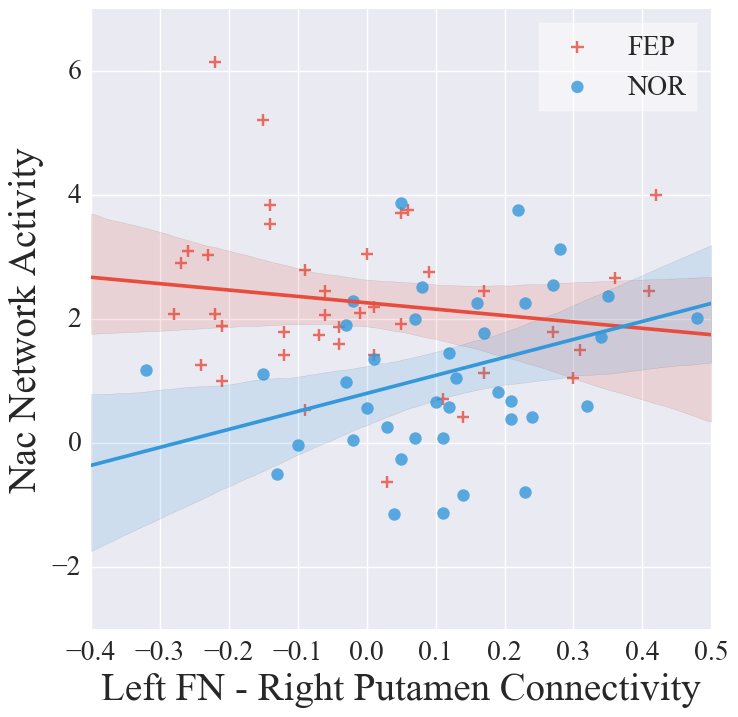

In [183]:
sns.set(font='Times New Roman')
rc={'font.size': 32, 
    'legend.fontsize': 20, 
    'axes.labelsize': 28, 
    'axes.titlesize': 10, 
    'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(**rc)

fig, axes = plt.subplots(figsize=(8,8))
fig.set_dpi(300)
ax1 = plt.subplot2grid((1,1), (0,0))

gb = df.groupby('group')
# colorList = ['red','lightblue']
colorList = ["#e74c3c","#3498db"]

marker = ['+','o']
groups = gb.groups.keys()

for groupNum, c, m in zip(gb.groups.keys(), colorList, marker):    
    if groupNum ==1:
        groupName = 'FEP'
    else:
        groupName = 'NOR'
    sns.regplot(gb.get_group(groupNum)['Left FN - Right Putamen Connectivity'],
           gb.get_group(groupNum)['Nac Network Activity'],
           scatter_kws={'s':80},
           marker=m,
           color=c,
           label=groupName,
           ax=ax1,
           )


# Plot the legend
ax1.legend()
legend = plt.legend(frameon=True, framealpha=0.5)
frame = legend.get_frame()
# frame.set_edgecolor('black')
frame.set_facecolor('white')


# legend_patches = [matplotlib.patches.Patch(color=C, label=L, hatch='+') for
#                   C, L, M in zip(colorList,
#                                  ['FEP','NOR'],
#                                  marker)]
# plt.legend(markerfirst=True, handles=legend_patches)

plt.show()